# First Example of CNN

We use a InceptionV3-Model from Keras as Convolutional Base, also uses a simple classification head with a few layers.
Is a example from Kaggle, changed for be used in Google Colab and uses they GPU.
The dataset is the Car vs Truck, where images are classified in these two classes.

In [22]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np

import pandas as pd

import tensorflow_hub as hub

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image_dataset_from_directory

Loading the Data and making the preprocessing of the images to the model.

In [21]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/valid', 
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [7]:
# Just checking if the GPU is available

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")

print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


In [11]:
base_model = InceptionV3(weights='imagenet', include_top=False)

# Taking the base convolutional base Inception

87924736/87910968 [==============================] - 0s 0us/step


In [12]:
base_model.trainable = False # Set to do not train the base again, mostly the time this is false

In [14]:

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pooling layer in the end of the convolutional
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Selecting the optimizes, loss and metric

In [15]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [18]:
# Train and validate phase

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=100,
)

Epoch 1/100
80/80 [==============================] - 7s 94ms/step - loss: 0.4180 - binary_accuracy: 0.8495 - val_loss: 0.4946 - val_binary_accuracy: 0.7961
Epoch 2/100
80/80 [==============================] - 8s 94ms/step - loss: 0.4035 - binary_accuracy: 0.8472 - val_loss: 0.4643 - val_binary_accuracy: 0.7967
Epoch 3/100
80/80 [==============================] - 7s 94ms/step - loss: 0.3781 - binary_accuracy: 0.8403 - val_loss: 0.4565 - val_binary_accuracy: 0.8002
Epoch 4/100
80/80 [==============================] - 8s 95ms/step - loss: 0.3561 - binary_accuracy: 0.8470 - val_loss: 0.4808 - val_binary_accuracy: 0.7975
Epoch 5/100
80/80 [==============================] - 8s 100ms/step - loss: 0.3438 - binary_accuracy: 0.8509 - val_loss: 0.4899 - val_binary_accuracy: 0.7945
Epoch 6/100
80/80 [==============================] - 7s 94ms/step - loss: 0.3354 - binary_accuracy: 0.8569 - val_loss: 0.4838 - val_binary_accuracy: 0.8012
Epoch 7/100
80/80 [==============================] - 8s 98ms/st

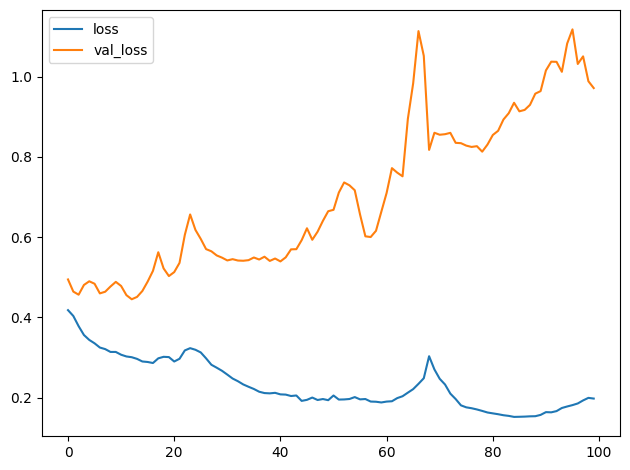

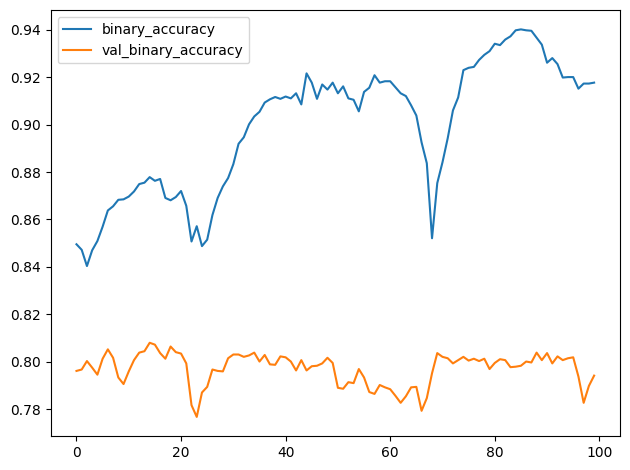

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

As a first CNN i made, these simple example is a good one, the dataset is just in train and valid, for the simplification i will maintain just that.

Is possible to see a overfitting in the loss function close to the 10 epochs.